In [3]:
import numpy             as np
import pandas            as pd 
import matplotlib.pyplot as plt
import matplotlib        as mpl
import statsmodels.api   as sm
import statsmodels.formula.api as smf
from sklearn.datasets    import load_boston 
from sklearn             import linear_model

%matplotlib inline

In [4]:
boston = load_boston()
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target

observations = len(dataset)
variables = dataset.columns[:-1]
X = dataset.iloc[:, :-1]
y = dataset['target'].values

In [3]:
Xc = sm.add_constant(X)
lineReg = sm.OLS(y, Xc)
fitted_model = lineReg.fit()
fitted_model.summary()

C:\Users\Cidones\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 09 Nov 2019   Prob (F-statistic):          6.72e-135
Time:                        11:38:04   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Using formulas as an alternative

In [5]:
linear_regression = smf.ols(formula= 'target ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', data=dataset)
fitted_model = linear_regression.fit()

In [10]:
X = dataset.iloc[:, :-1]
correlation_matrix = X.corr()
print(correlation_matrix)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

ConversionError: Failed to convert value(s) to axis units: Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

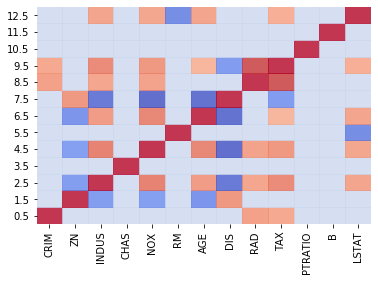

In [8]:
def visualise_correlation_matrix(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar=0)
    R[np.where(np.abs(R) < hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap=mpl.cm.coolwarm, alpha = 0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor=False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor=False)
    heatmap.axes.set_xticklabels(variables, minor=False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticks(variables, minor=False)
    plt.tick_params(axis='both', which='both', bottom='off', top='off', left='off', right='off')
    plt.colorbar()
    plt.show()
    
visualise_correlation_matrix(X, hurdle=0.5)

In [11]:
corr = np.corrcoef(X, rowvar=0)
eigenvalues, eigenvector = np.linalg.eig(corr)
print(eigenvalues)

[6.12684883 1.43327512 1.24261667 0.85757511 0.83481594 0.65740718
 0.53535609 0.39609731 0.06350926 0.27694333 0.16930298 0.18601437
 0.22023782]


In [12]:
print(eigenvector[:, 8])

[-0.0459523   0.08091897  0.25107654 -0.03592171 -0.04363045 -0.0455671
  0.03855068  0.01829854  0.63348972 -0.72023345 -0.02339805  0.00446307
 -0.02443168]


In [13]:
print(variables[2], variables[8], variables[9])

INDUS RAD TAX
